In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

from google.colab import files

print("Libraries ready.")

# Uploading two final files
uploaded = files.upload()

Libraries ready.


Saving Booking_Master_Normalized_Ratings.xlsx to Booking_Master_Normalized_Ratings.xlsx
Saving TripAdvisor_Master_Final.xlsx to TripAdvisor_Master_Final.xlsx


In [ ]:
# Loading the two masters you just uploaded
booking = pd.read_excel('Booking_Master_Normalized_Ratings.xlsx')
trip = pd.read_excel('TripAdvisor_Master_Final.xlsx')

print(f"Booking reviews: {len(booking)}")
print(f"TripAdvisor reviews: {len(trip)}")

# Creating unified review text
booking['review_text'] = (booking['LikedText'].fillna('') + ' ' + booking['DislikedText'].fillna('')).str.strip()
trip['review_text'] = trip['LikedText'].fillna('').str.strip()

# Standardizing main rating column
booking['OverallRating'] = booking['HotelRating']
trip['OverallRating'] = trip['HotelRating']

# Parse dates and create month_year
booking['ReviewDate'] = pd.to_datetime(booking['ReviewDate'], errors='coerce')
trip['ReviewDate'] = pd.to_datetime(trip['ReviewDate'], errors='coerce')

booking['month_year'] = booking['ReviewDate'].dt.to_period('M')
trip['month_year'] = trip['ReviewDate'].dt.to_period('M')

# Concatenating into one unified DF
final_df = pd.concat([booking, trip], ignore_index=True)

print(f"\nUnified DataFrame created!")
print(f"Total reviews: {len(final_df)}")
print(f"Unique hotels: {final_df['Hotel/Resort'].nunique()}")
print("Columns:", final_df.columns.tolist())

Booking reviews: 11049
TripAdvisor reviews: 23934

Unified DataFrame created!
Total reviews: 34983
Unique hotels: 12
Columns: ['CheckInDate', 'CheckOutDate', 'DislikedText', 'Hotel/Resort', 'HotelRatingLabel', 'StaffRating', 'FacilitiesRating', 'CleanlinessRating', 'ComfortRating', 'ValueforMoneyRating', 'LocationRating', 'FreeWifiRating', 'LikedText', 'NumberofNights', 'PropertyResponse', 'HotelRating', 'ReviewDate', 'ReviewLanguage', 'ReviewTitle', 'RoomtipText', 'TravlerType', 'UserLocation', 'UserName', 'Platform', 'review_text', 'OverallRating', 'month_year', 'OwnerResponsepublishedDate', 'OwnerResponse', 'placeInfo/rating', 'RatingPublishedPlatform', 'TripType', 'TotalReviewsbyUser', 'UserLocationinShort', 'SleepQualityRating']


In [ ]:
# Creating unified review_text (LikedText + DislikedText for Booking, LikedText for TripAdvisor)
booking['review_text'] = (booking['LikedText'].fillna('') + ' ' + booking['DislikedText'].fillna('')).str.strip()
trip['review_text'] = trip['LikedText'].fillna('').str.strip()

# Standardize main rating
booking['OverallRating'] = booking['HotelRating']
trip['OverallRating'] = trip['HotelRating']

# Parse ReviewDate and create month_year
booking['ReviewDate'] = pd.to_datetime(booking['ReviewDate'], errors='coerce')
trip['ReviewDate'] = pd.to_datetime(trip['ReviewDate'], errors='coerce')

booking['month_year'] = booking['ReviewDate'].dt.to_period('M')
trip['month_year'] = trip['ReviewDate'].dt.to_period('M')

# Get union of columns (NaN for missing)
all_columns = list(set(booking.columns) | set(trip.columns))
booking_u = booking.reindex(columns=all_columns)
trip_u = trip.reindex(columns=all_columns)

# Final unified DF
final_df = pd.concat([booking_u, trip_u], ignore_index=True)

print(f"Unified DataFrame ready!")
print(f"Total reviews: {len(final_df)}")
print(f"Unique hotels: {final_df['Hotel/Resort'].nunique()}")
print("Missing review_text:", final_df['review_text'].isnull().sum())

Unified DataFrame ready!
Total reviews: 34983
Unique hotels: 12
Missing review_text: 0


In [ ]:
csv_filename = 'Final_Merged_Reviews.csv'
final_df.to_csv(csv_filename, index=False)
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hotel Performance Ranking (Average Rating 1-5 Scale):


,AverageRating,ReviewCount
Hotel/Resort,,
Cinnamon Red Colombo,4.79,2850
Kandy Mist by Cinnamon,4.75,2499
Cinnamon Lakeside Colombo,4.70,3209
Cinnamon Life Colombo,4.69,1786
Cinnamon Grand Colombo,4.56,2979
Hikka Tranz by Cinnamon,4.54,3815
Cinnamon Wild Yala,4.46,2014
Cinnamon Citadel Kandy,4.44,2917
Cinnamon Bey Beruwala,4.43,5000


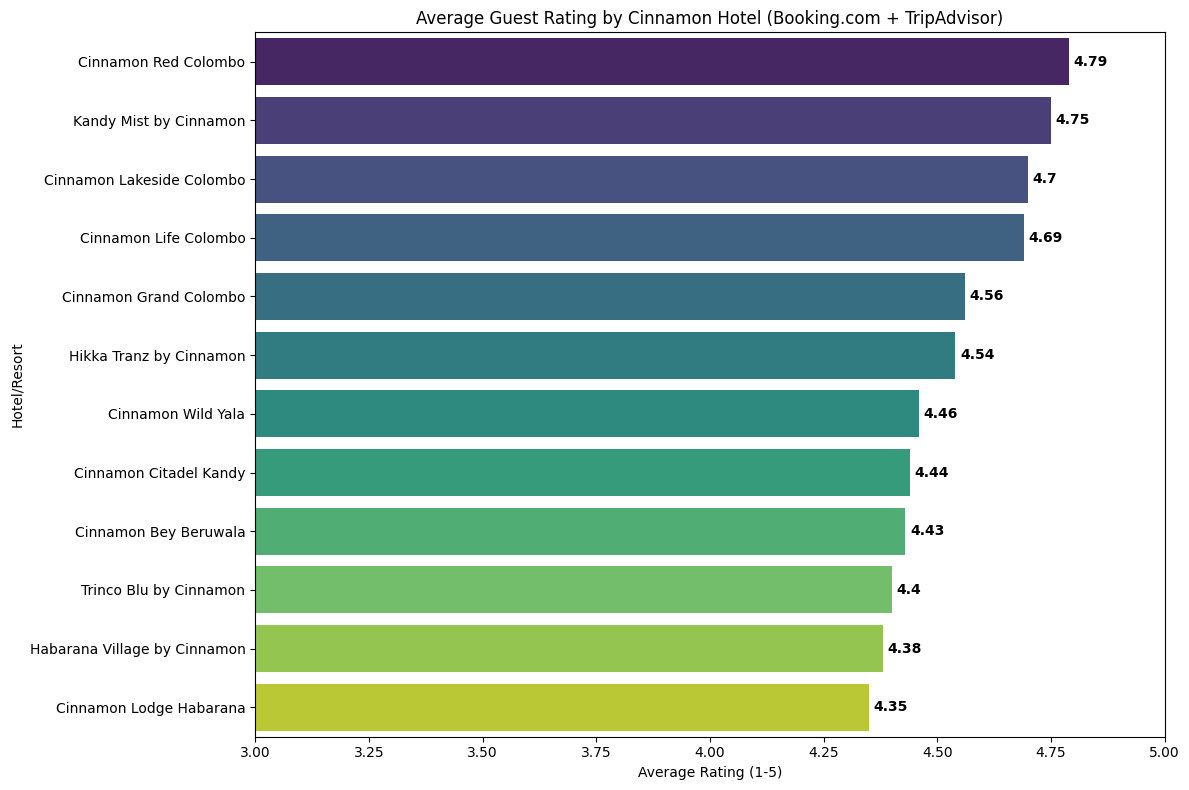

In [ ]:
# Average OverallRating by hotel
hotel_rating = final_df.groupby('Hotel/Resort')['OverallRating'].agg(['mean', 'count']).round(2)
hotel_rating = hotel_rating.sort_values('mean', ascending=False)
hotel_rating = hotel_rating.rename(columns={'mean': 'AverageRating', 'count': 'ReviewCount'})

print("Hotel Performance Ranking (Average Rating 1-5 Scale):")
display(hotel_rating)

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=hotel_rating.reset_index(), x='AverageRating', y='Hotel/Resort', palette='viridis')
plt.title('Average Guest Rating by Cinnamon Hotel (Booking.com + TripAdvisor)')
plt.xlabel('Average Rating (1-5)')
plt.ylabel('Hotel/Resort')
plt.xlim(3, 5)
for i, v in enumerate(hotel_rating['AverageRating']):
    plt.text(v + 0.01, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

Low-rated Reviews (≤ 3 stars): 2880 out of 34983 (8.2%)

Low-rated reviews by hotel (top 10):


,count
Hotel/Resort,
Cinnamon Bey Beruwala,425
Cinnamon Lodge Habarana,415
Trinco Blu by Cinnamon,375
Cinnamon Citadel Kandy,319
Hikka Tranz by Cinnamon,315
Cinnamon Grand Colombo,224
Cinnamon Wild Yala,198
Cinnamon Lakeside Colombo,163
Habarana Village by Cinnamon,161


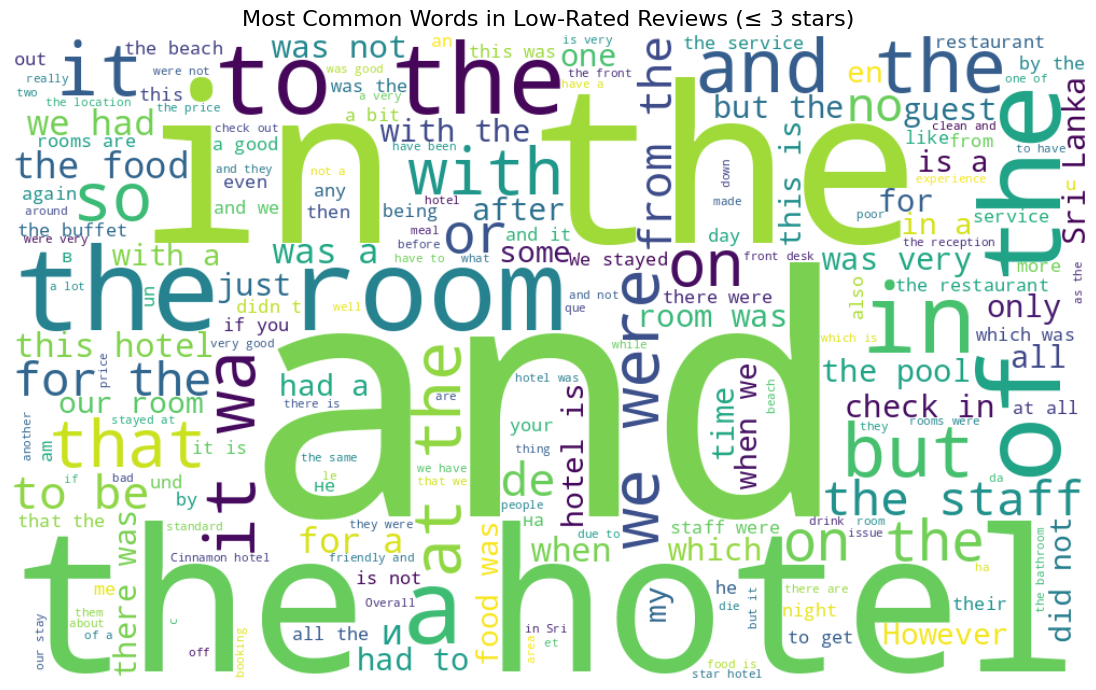

In [ ]:
# Filtering negative / low-rated reviews (rating ≤ 3)
negative_df = final_df[final_df['OverallRating'] <= 3]

# Stats
total_reviews = len(final_df)
neg_count = len(negative_df)
neg_percentage = round((neg_count / total_reviews * 100), 1)

print(f"Low-rated Reviews (≤ 3 stars): {neg_count} out of {total_reviews} ({neg_percentage}%)")

# Negative/low-rated reviews by hotel
neg_by_hotel = negative_df['Hotel/Resort'].value_counts().sort_values(ascending=False)
print("\nLow-rated reviews by hotel (top 10):")
display(neg_by_hotel.head(10))

# Word cloud of low-rated review text
neg_text = ' '.join(negative_df['review_text'].dropna().astype(str))

if len(neg_text.strip()) == 0:
    print("No text in low-rated reviews – word cloud skipped.")
else:
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    wordcloud = WordCloud(
        width=1000,
        height=600,
        background_color='white',
        stopwords='english',
        min_font_size=10
    ).generate(neg_text)

    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words in Low-Rated Reviews (≤ 3 stars)', fontsize=16)
    plt.tight_layout()
    plt.show()

# Downloading Bad Reviews Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Final_Merged_Reviews.csv to Final_Merged_Reviews (1).csv


In [ ]:
import pandas as pd
from google.colab import files

# Replace 'Final_Merged_Reviews.csv' with the exact name shown after upload
filename = list(uploaded.keys())[0]   # automatically takes the uploaded file name
df = pd.read_csv(filename, low_memory=False)

# Filter bad reviews
bad_df = df[df['OverallRating'] <= 3].copy()
print(f"Bad reviews (≤ 3 stars): {len(bad_df)} rows")   # should be ~2880

# Safe date cleaning (removes timezone issues, handles mixed formats)
date_cols = ['ReviewDate', 'CheckInDate', 'CheckOutDate', 'OwnerResponsepublishedDate']
for col in date_cols:
    if col in bad_df.columns:
        bad_df[col] = pd.to_datetime(bad_df[col], errors='coerce').dt.tz_localize(None)

# Fill empty text (prevents future errors)
bad_df['review_text']   = bad_df['review_text'].fillna('')
bad_df['DislikedText']  = bad_df['DislikedText'].fillna('')
bad_df['LikedText']     = bad_df['LikedText'].fillna('')

# Save & download as Excel
bad_df.to_excel('Bad_Reviews_Dataset.xlsx', index=False, engine='openpyxl')
files.download('Bad_Reviews_Dataset.xlsx')

print("Excel file downloaded → check your Downloads folder.")

Bad reviews (≤ 3 stars): 2880 rows


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Excel file downloaded → check your Downloads folder.
